<h1>Exploring and training some Machine models on the Mnist data set</h1>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
#Loading dataset and printing the description
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
print(dir(mnist))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [4]:
#Splitting the data to X and y
X = mnist['data']
y = mnist['target'].astype(np.uint8)

In [5]:
#Splitting the data into training, validation and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

<h2>EDA</h2>

In [6]:
df_mnist = pd.DataFrame(X_train)

In [7]:
df_mnist['target'] = y_train

In [11]:
df_mnist.count()

0         50000
1         50000
2         50000
3         50000
4         50000
          ...  
780       50000
781       50000
782       50000
783       50000
target    50000
Length: 785, dtype: int64

In [12]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 785 entries, 0 to target
dtypes: int64(784), uint8(1)
memory usage: 299.1 MB


In [13]:
df_mnist.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
780       0
781       0
782       0
783       0
target    0
Length: 785, dtype: int64

In [14]:
df_mnist.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096580,0.04014,0.017260,0.01306,0.001240,0.0,0.0,0.0,0.0,4.454660
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.118897,2.58817,1.685615,1.44559,0.277272,0.0,0.0,0.0,0.0,2.886547
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.00000,253.000000,244.00000,62.000000,0.0,0.0,0.0,0.0,9.000000


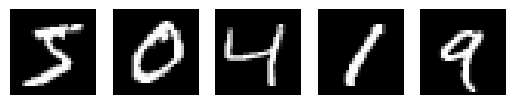

In [15]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()